# Project: Wrangling and Analyze Data - WeRateDogs

In [1]:
import pandas as pd
import requests
import numpy as np
import tweepy
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# the twitter_archive_enhanced.csv file was downloaded from the link provided in -
# the project lesson and read into a dataframe using the code below:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#summarized information about the twitter archive dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#randomly view the imported dataframe
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
1814,676617503762681856,NaN,NaN,2015-12-15 04:19:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I promise this wasn't meant to be a cuteness o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676617503...,13,10,None,None,None,pupper,None
967,750381685133418496,7.501805e+17,4.717297e+09,2016-07-05 17:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 such a good doggo\n@spaghemily,NaN,NaN,NaN,NaN,13,10,None,doggo,None,None,None
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,None,None
875,761227390836215808,NaN,NaN,2016-08-04 15:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert. He just found out that bees ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,None,None,None,None


In [5]:
#Code below was important to see ratings that were not about dogs:
not_dogs  = df[df['text'].str.match('.*only rate dog')]
not_dogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
390,826240494070030336,NaN,NaN,2017-01-31 01:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826240494...,11,10,None,None,None,None,None
1077,739544079319588864,NaN,NaN,2016-06-05 19:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
154,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
869,761745352076779520,NaN,NaN,2016-08-06 02:06:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys.. we only rate dogs. Pls don't send any m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761745352...,11,10,None,None,None,None,None


In [6]:
#checking for the accuracy of the rating numerator
df.rating_numerator.sort_values()
#There are obviously some outliers here that will need cleaning

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
#the code below uses the requests library to obtain a response variable from the url provided in the project lesson
response = requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response

<Response [200]>

In [8]:
#writing the response variable into a tsv file on the workspace directory
with open(os.path.join('Downloads', 'image.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [9]:
# reading the downloaded file into a dataframe
image = pd.read_csv('Downloads/image.tsv', '\t')
#obtaining summarized information about the dataset
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# visually assessing the file's structure
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
an              7
Daisy           7
Toby            7
Buddy           7
Bella           6
Scout           6
Dave            6
Rusty           6
Jax             6
Jack            6
Milo            6
Stanley         6
Leo             6
Koda            6
Oscar           6
Chester         5
             ... 
Carbon          1
Maisey          1
Liam            1
Ronduh          1
this            1
Tonks           1
Gòrdón          1
Mairi           1
Rose            1
officially      1
Shiloh          1
Ulysses         1
Gin             1
Dietrich        1
Jazz            1
Napolean        1
Teddy           1
Vince           1
Dobby           1
Meatball        1
Karl            1
Gustav          1
Gustaf          1
Chesterson      1
Lambeau   

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
tweets = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets.append(data)
df3 = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
df3.sample(5)

,id,retweet_count,favorite_count
1059,741303864243200000,3650,9631
41,884247878851493888,21298,74423
2111,670434127938719744,708,1501
790,773704687002451968,1891,7317
394,825535076884762624,19669,56413


Unfortunately, i was unable to gain access to Twitter API despite following all the instructions provided in the project lessons so i resorted to downloading the text file and loading them into a pandas dataframe using the json library

### Quality issues
1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns contain data about retweets which are not very useful for this analysis hence will be dropped. Additionally, they contain missing values. The focus of this analysis is on orginal ratings.

2. timestamp object should be data type - datetime not object.

3. Going through the text column, some reviews were not about dogs. This will need to be removed as they are not valid for the purpose of this analysis.

4. Going through the source column, the tags are included in the tweet source, it may be important to extraxt the source only.

5. The dog ratings need to be properly extracted from the text column as there are a few outliers in the rating_numerator column.

6. The dog stages columns contain a lot of values with string 'none'. This is not helpful to this analysis and will be converted to null values

7. The rating denominator column is redundant as it is stated in the project guidance that the ratings are almost always over 10 Hence this will be dropped for the purpose of this analysis.

8. expanded_url column will be dropped as they are not very useful for the purpose of this analysis

### Tidiness issues
1. The p1, p2, p3, p1_conf, p2_conf, p3 conf, p1_dog, p2_dog and p3_dog consists of basically two variables that are useful to our analysis - The breed and the confidence level. The pictures that couldnt be recognised as dogs can be assigned values none to simplify the structure of the table and facilitate merging with other datasets in this analysis.

2. The dog stages columns in the twitter_archive dataset can be restructured into a single column.

3. The three datasets gathered for this analysis can be combined into one for deeper insights.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
df_cleaned = df.copy()
image_cleaned = image.copy()
df3_cleaned = df3.copy()

### Issue #1:

#### Define: 
drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns using a custom function.

#### Code:

In [15]:
#Get the index of in_reply_to_status_id and in_reply_to_user_id

reply_id_index = df_cleaned[df_cleaned['in_reply_to_status_id'].notnull()].index
reply_id_index

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [16]:
#Get the index of retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns
retweeted_status_id_index = df_cleaned[df_cleaned['retweeted_status_user_id'].notnull()].index
retweeted_status_id_index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [17]:
#create drop row/columns function
def drop_col_row(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True)

In [18]:
#Apply the above function to the generated indexes for columns to be dropped
drop_col_row(df_cleaned, reply_id_index)
drop_col_row(df_cleaned, retweeted_status_id_index)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [19]:
#it was important to drop the rows first to remove all observations connected to the variable. Now we can drop the columns

df_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1, inplace = True)

#### Test

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2: 
timestamp object should be data type - datetime not object.

#### Define
Change timpestamp data type from object to datetime

#### Code

In [21]:
df_cleaned.timestamp = pd.to_datetime(df.timestamp)

#### Test

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #3: 
Going through the text column, some reviews were not about dogs. This will need to be removed as they are not valid for the purpose of this analysis.

#### Define

Match all rows with text not about dogs using the string 'we only rate dogs', obtain the index and drop the corresponding rows.

In [23]:
not_dogs  = df_cleaned[df_cleaned['text'].str.match('.*only rate dog')].index
drop_col_row(df_cleaned, not_dogs)

#### Test

In [24]:
df_cleaned.info() #54 rows not about dogs have been dropped.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
text                  2043 non-null object
expanded_urls         2040 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
name                  2043 non-null object
doggo                 2043 non-null object
floofer               2043 non-null object
pupper                2043 non-null object
puppo                 2043 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 207.5+ KB


### Issue #4: 
Going through the source column, the tags are included in the tweet source, it may be important to extraxt the source only.

#### Define
Extract the tweet source using regular expressions

### Code

In [25]:
df_cleaned['source'] = df_cleaned['source'].str.extract('^<a.+>(.+)</a>$')

### Test

In [26]:
df_cleaned.source.value_counts()

Twitter for iPhone     1911
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### Issue #5:  
The dog ratings need to be properly extracted from the text column as there are a few outliers in the rating_numerator column.

### Define:
Extract the numerator only using regular expressions

### Code:

In [27]:
df_cleaned['rating_numerator'] = df_cleaned['text'].str.extract('(\d+\.*\d*/\d+)', expand=False).str.split('/').str[0]
df_cleaned.rating_numerator = df_cleaned.rating_numerator.astype('float') #converts numerator to an integer

### Test

In [28]:
df_cleaned.rating_numerator

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
5       13.0
6       13.0
7       13.0
8       13.0
9       14.0
10      13.0
11      13.0
12      13.0
13      12.0
14      13.0
15      13.0
16      12.0
17      13.0
18      13.0
20      12.0
21      13.0
22      14.0
23      13.0
24      13.0
26      13.0
27      13.0
28      13.0
29      12.0
31      13.0
33      12.0
        ... 
2326     2.0
2327     7.0
2328     9.0
2329    11.0
2330     6.0
2331     8.0
2332    10.0
2333     9.0
2334     3.0
2335     1.0
2336    11.0
2337    10.0
2338     1.0
2339    11.0
2340     8.0
2341     9.0
2342     6.0
2343    10.0
2344     9.0
2345    10.0
2346     8.0
2347     9.0
2348    10.0
2349     2.0
2350    10.0
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2043, dtype: float64

### Issue 6
The dog stages columns contain a lot of values with string 'none'. This is not helpful to this analysis and will be converted to null values so it can be tidied in a single column later.

### Define:
Replace all dog stages columns containing string 'none' to Nan Values

### Code:


In [29]:
dog_stages_columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_cleaned[dog_stages_columns] = df_cleaned[dog_stages_columns].replace('None', np.nan)



### Test

In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
text                  2043 non-null object
expanded_urls         2040 non-null object
rating_numerator      2043 non-null float64
rating_denominator    2043 non-null int64
name                  2043 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 207.5+ KB


### Issue #7:  
The rating denominator column is redundant as it is stated in the project guidance that the ratings are almost always over 10 Hence this will be dropped for the purpose of this analysis.

### Define:
Drop rating denominator column

### Code:

In [31]:
drop_col_row(df_cleaned, 'rating_denominator', axis=1)

### Test:

In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id            2043 non-null int64
timestamp           2043 non-null datetime64[ns]
source              2043 non-null object
text                2043 non-null object
expanded_urls       2040 non-null object
rating_numerator    2043 non-null float64
name                2043 non-null object
doggo               83 non-null object
floofer             10 non-null object
pupper              230 non-null object
puppo               24 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 191.5+ KB


### Issue #7: 
expanded_url column will be dropped as they are not very useful for the purpose of this analysis

### Define: 
Remove expanded_url column

### Code:

In [33]:
drop_col_row(df, 'expanded_urls', axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id            2043 non-null int64
timestamp           2043 non-null datetime64[ns]
source              2043 non-null object
text                2043 non-null object
expanded_urls       2040 non-null object
rating_numerator    2043 non-null float64
name                2043 non-null object
doggo               83 non-null object
floofer             10 non-null object
pupper              230 non-null object
puppo               24 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 191.5+ KB


## Tidiness Issues:

### Issue 1: 
The p1, p2, p3, p1_conf, p2_conf, p3 conf, p1_dog, p2_dog and p3_dog columns in the image table consists of basically two variables that are useful to our analysis - The breed and the confidence level. The pictures that couldnt be recognised as dogs can be assigned values none to simplify the structure of the table and facilitate merging with other datasets in this analysis.

### Define:
Use numpy select function to select values into newly created breed and confidence level columns based on the true value for each observation in the image table and return none for observations with all false values. This will ensure only the most confident predictions remain in table. After this, The p1, p2, p3, p1_conf, p2_conf, p3 conf, p1_dog, p2_dog and p3_dog columns will be dropped.

### Code:


In [34]:
truth_test = [(image_cleaned['p1_dog'] == True),(image_cleaned['p2_dog'] == True), (image_cleaned['p3_dog'] == True)]

breed = [image_cleaned['p1'], image_cleaned['p2'], image_cleaned['p3']]

pred_conf = [image_cleaned['p1_conf'], image_cleaned['p2_conf'], image_cleaned['p3_conf']]

image_cleaned['breed'] = np.select(truth_test, breed, default='None')

image_cleaned['prediction'] = np.select(truth_test, pred_conf, default=0)

drop_col_row(image_cleaned,['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis = 1)

### Test:

In [35]:
image_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
prediction    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


### Issue 2: 
The dog stages columns in the twitter_archive dataset can be restructured into a single column.

### Define:
Use a join function on a list of columns to be combined. The join function will also drop null values that were converted from 'None' strings earlier in this analysis. Finally, the dog stages columns will be dropped using my custom drop columns function.


### Code:

In [36]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
def join(List):
    return ', '.join(List.dropna().astype(str))

df_cleaned['dog_stages'] = df_cleaned[dog_stages].apply(join, axis=1)

df_cleaned['dog_stages'] = df_cleaned['dog_stages'].replace('',np.nan)

drop_col_row(df_cleaned, ['doggo', 'floofer', 'pupper', 'puppo'], axis = 1 )

In [37]:
#Test

df_cleaned.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages
545,805826884734976000,2016-12-05 17:31:15,Twitter for iPhone,This is Duke. He is not a fan of the pupporazz...,https://twitter.com/dog_rates/status/805826884...,12.0,Duke,NaN
998,748307329658011649,2016-06-30 00:09:04,Twitter for iPhone,This sherk must've leapt out of the water and ...,https://twitter.com/dog_rates/status/748307329...,7.0,None,NaN
1768,678389028614488064,2015-12-20 01:38:42,Twitter for iPhone,This is Bella. She just learned that her final...,https://twitter.com/dog_rates/status/678389028...,11.0,Bella,pupper
700,786233965241827333,2016-10-12 15:55:59,Twitter for iPhone,This is Mattie. She's extremely dangerous. Wil...,https://twitter.com/dog_rates/status/786233965...,11.0,Mattie,NaN
65,879492040517615616,2017-06-27 00:10:17,Twitter for iPhone,This is Bailey. He thinks you should measure e...,https://twitter.com/dog_rates/status/879492040...,12.0,Bailey,NaN
1550,689154315265683456,2016-01-18 18:36:07,Twitter for iPhone,We normally don't rate birds but I feel bad co...,https://twitter.com/dog_rates/status/689154315...,9.0,None,NaN
761,778286810187399168,2016-09-20 17:36:50,Twitter for iPhone,This is Stanley. He has too much skin. Isn't h...,https://twitter.com/dog_rates/status/778286810...,11.0,Stanley,NaN
670,789986466051088384,2016-10-23 00:27:05,Twitter for iPhone,This is Happy. He's a bathtub reviewer. Seems ...,https://twitter.com/dog_rates/status/789986466...,12.0,Happy,NaN
1245,711732680602345472,2016-03-21 01:54:29,Twitter for iPhone,I want to hear the joke this dog was just told...,https://twitter.com/dog_rates/status/711732680...,10.0,None,NaN
1118,732005617171337216,2016-05-16 00:31:53,Twitter for iPhone,This is Larry. He has no self control. Tongue ...,https://twitter.com/dog_rates/status/732005617...,11.0,Larry,NaN


### Issue 3: 
The three datasets gathered for this analysis can be combined into one for deeper insights.

### Define:
The merge function will be used to combine all three datasets on tweet_id.


### Code:

In [38]:
twitter_archive_master = pd.merge(df_cleaned, df3_cleaned, left_on = 'tweet_id', right_on = 'id', how='left')
twitter_archive_master = pd.merge(twitter_archive_master, image_cleaned, on = 'tweet_id' , how='inner')
#test
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,id,retweet_count,favorite_count,jpg_url,img_num,breed,prediction
689,750101899009982464,2016-07-04 23:00:03,Twitter for iPhone,Meet Lilah. She agreed on one quick pic. Now s...,https://twitter.com/dog_rates/status/750101899...,11.0,Lilah,NaN,750101899009982464,959,3344,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704
1377,677565715327688705,2015-12-17 19:07:09,Twitter for iPhone,Contortionist pup here. Inside pentagram. Clea...,https://twitter.com/dog_rates/status/677565715...,6.0,None,NaN,677565715327688705,513,1409,https://pbs.twimg.com/media/CWcybBmWcAAigAQ.jpg,1,basset,0.397295
1885,666421158376562688,2015-11-17 01:02:40,Twitter for iPhone,*internally screaming* 12/10 https://t.co/YMcr...,https://twitter.com/dog_rates/status/666421158...,12.0,None,NaN,666421158376562688,118,327,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777
1630,671163268581498880,2015-11-30 03:06:07,Twitter for iPhone,Pack of horned dogs here. Very team-oriented b...,https://twitter.com/dog_rates/status/671163268...,8.0,None,NaN,671163268581498880,1198,1763,https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg,1,Scottish_deerhound,0.026983
1616,671511350426865664,2015-12-01 02:09:16,Twitter for iPhone,Say hello to Hammond. He's just a wee lil pup....,https://twitter.com/dog_rates/status/671511350...,8.0,Hammond,NaN,671511350426865664,791,1734,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,1,None,0.000000


In [39]:
#drop redundant id column

drop_col_row(twitter_archive_master, 'id', axis =1)

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 1916
Data columns (total 14 columns):
tweet_id            1917 non-null int64
timestamp           1917 non-null datetime64[ns]
source              1917 non-null object
text                1917 non-null object
expanded_urls       1917 non-null object
rating_numerator    1917 non-null float64
name                1917 non-null object
dog_stages          303 non-null object
retweet_count       1917 non-null int64
favorite_count      1917 non-null int64
jpg_url             1917 non-null object
img_num             1917 non-null int64
breed               1917 non-null object
prediction          1917 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 224.6+ KB


In [40]:
#Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 1916
Data columns (total 14 columns):
tweet_id            1917 non-null int64
timestamp           1917 non-null datetime64[ns]
source              1917 non-null object
text                1917 non-null object
expanded_urls       1917 non-null object
rating_numerator    1917 non-null float64
name                1917 non-null object
dog_stages          303 non-null object
retweet_count       1917 non-null int64
favorite_count      1917 non-null int64
jpg_url             1917 non-null object
img_num             1917 non-null int64
breed               1917 non-null object
prediction          1917 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 224.6+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [41]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

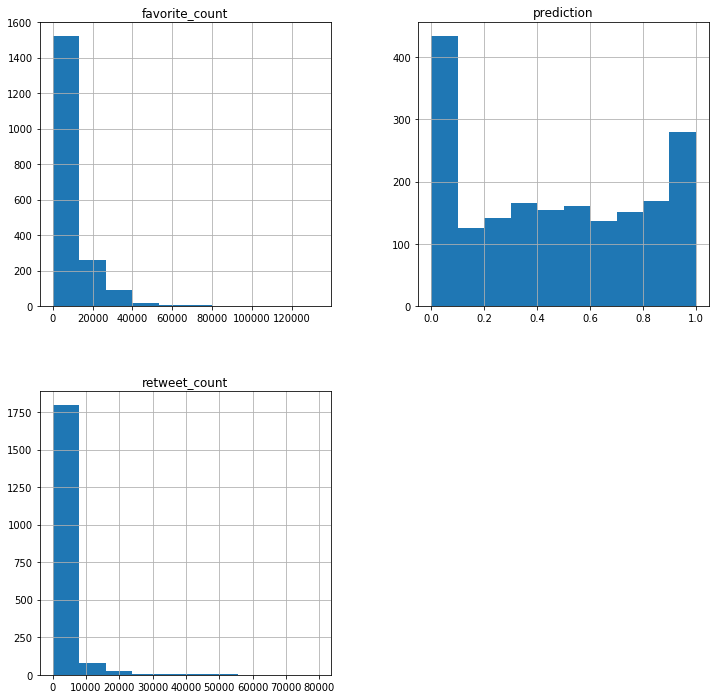

In [42]:
#The code below is to have a general overview of the distribution of the relevant data columns
twitter_archive_master[['favorite_count','prediction', 'retweet_count']].hist(figsize =(12,12));


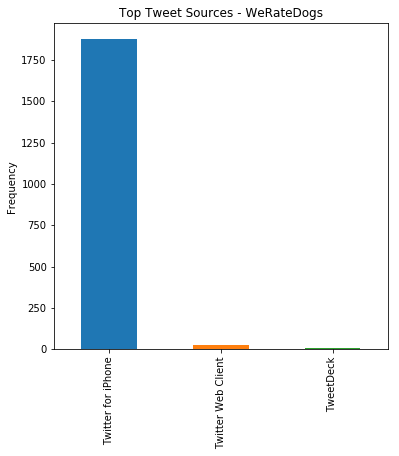

In [43]:
# I am interested in seeing which of the tweet sources appeared the most in this dataset
popular_sources = twitter_archive_master['source'].value_counts()
popular_sources.plot(kind = 'bar', title = 'Top Tweet Sources - WeRateDogs', figsize = (6,6));
plt.ylabel('Frequency');


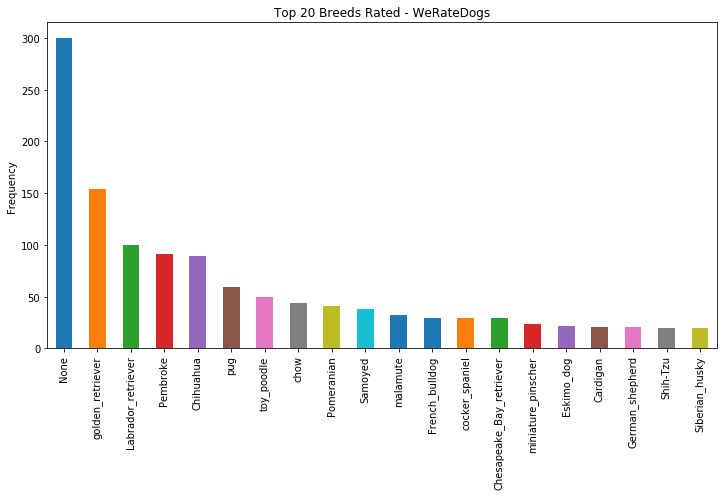

In [44]:
#I would like to see the most popular breeds in these ratings
popular_breeds = twitter_archive_master['breed'].value_counts().sort_values(ascending = False).head(20)
popular_breeds.plot(kind = 'bar', title = 'Top 20 Breeds Rated - WeRateDogs', figsize = (12,6));
plt.ylabel('Frequency');


Text(0.5,0,'Breed')

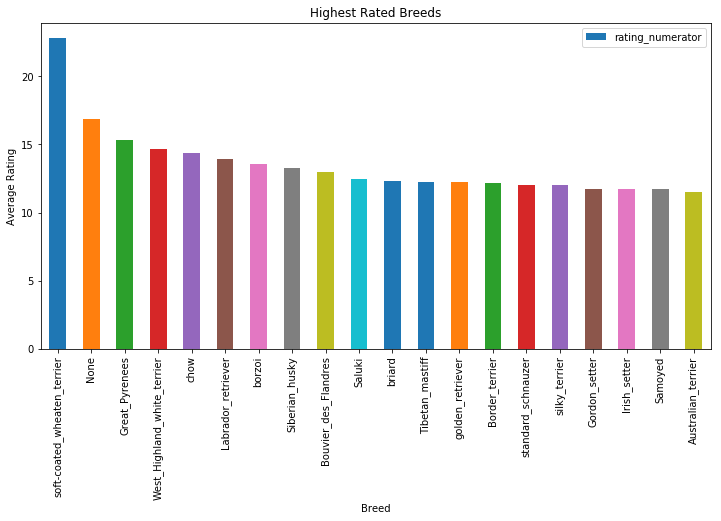

In [45]:
#I would also like to see the breed with the highest average rating

df_highest_ratings = twitter_archive_master.groupby('breed').rating_numerator.mean()
df_highest_ratings = df_highest_ratings.to_frame()
df_highest_ratings.reset_index(inplace = True)
df_highest_ratings.sort_values('rating_numerator', ascending = False).head(20).plot(x = 'breed', y = 'rating_numerator', kind = 'bar', title = 'Highest Rated Breeds', figsize = (12,6));
plt.ylabel('Average Rating')
plt.xlabel("Breed")


### Insights:
1. Most of the tweets that make up the ratings were made from an iPhone.

2. Golden Retreiver Dogs appeared the most in the ratings if the uncategorised dog breeds are not considered. However, given the amount of dogs with unspecified breeds, it may be very difficult to pick a winner here.

3. Soft coated wheaten terrier dogs received the highest ratings on average.

4. From the histograms, favourite count above 20,000 and Retweet count above 10,000 on original tweets about dog ratings are not fairly common.

In [46]:
twitter_archive_master.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,breed,prediction
1688,670411370698022913,2015-11-28 01:18:21,Twitter for iPhone,Meet Scooter. He's ready for his first day of ...,https://twitter.com/dog_rates/status/670411370...,12.0,Scooter,NaN,991,2176,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,Stuart,puppo,2321,15359,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442
1453,675145476954566656,2015-12-11 02:49:59,Twitter for iPhone,What an honor. 3 dogs here. Blond one is clear...,https://twitter.com/dog_rates/status/675145476...,9.0,None,NaN,1011,2305,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746
1399,676819651066732545,2015-12-15 17:42:34,Twitter for iPhone,Watch out Airbud. This pupper is also good at ...,https://twitter.com/dog_rates/status/676819651...,12.0,None,pupper,741,1957,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,Labrador_retriever,0.039465
801,733460102733135873,2016-05-20 00:51:30,Twitter for iPhone,This is Hermione. Her face is as old as time. ...,https://twitter.com/dog_rates/status/733460102...,11.0,Hermione,NaN,1451,4605,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,0.931275
872,718454725339934721,2016-04-08 15:05:29,Twitter for iPhone,This pic is old but I hadn't seen it until tod...,https://twitter.com/dog_rates/status/718454725...,13.0,None,NaN,1685,5320,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,None,0.000000
1475,674664755118911488,2015-12-09 18:59:46,Twitter for iPhone,This is Rodman. He's getting destroyed by the ...,https://twitter.com/dog_rates/status/674664755...,10.0,Rodman,NaN,276,994,https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg,1,None,0.000000
920,711008018775851008,2016-03-19 01:54:56,Twitter for iPhone,This is Chuckles. He had a balloon but he acci...,https://twitter.com/dog_rates/status/711008018...,11.0,Chuckles,pupper,710,3275,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,1,French_bulldog,0.731405
52,880221127280381952,2017-06-29 00:27:25,Twitter for iPhone,Meet Jesse. He's a Fetty Woof. His tongue ejec...,https://twitter.com/dog_rates/status/880221127...,12.0,Jesse,NaN,4436,27640,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,Chihuahua,0.238525
889,715342466308784130,2016-03-31 00:58:29,Twitter for iPhone,This is Oscar. He's a world renowned snowball ...,https://twitter.com/dog_rates/status/715342466...,10.0,Oscar,NaN,768,3294,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier,0.597111


In [48]:
image.to_csv('image', index = False)